In [1]:
"""
This is a jupyter notebook for the purpose to show the exponential nature of radioactive decay.

The first part is about using a dice throw model to simulate a radioactive decay.

The second part is to approximate the infinitestimal time lapse to show the difference between
the definition of decay constant and the unit (i.e. probability of decay per unit time != probability
of decay per second)
"""


'\nThis is a jupyter notebook for the purpose to show the exponential nature of radioactive decay.\n\nThe first part is about using a dice throw model to simulate a radioactive decay.\n\nThe second part is to approximate the infinitestimal time lapse to show the difference between\nthe definition of decay constant and the unit (i.e. probability of decay per unit time != probability\nof decay per second)\n'

In [2]:
# import relevant modules

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# create a dice throw

class Die():
    def __init__(self, face_up = 0):
        self.sides = np.arange(1, 7)
        if face_up in range(1, 7):
            self.face_up = face_up
        else:
            self.face_up = np.random.randint(1, 7)

    def throw(self):
        return np.random.randint(1, 7)
    
    # record the number thrown in an array
    def throw_n(self, n_dice):
        res = np.zeros(6)
        for throw in range(n_dice):
            res[self.throw()-1] += 1
        return res
    

In [4]:
# Let throwing a '1' represent a decay (i.e. transmutate to another identity) and is removed from the set. 
# Record the number of 1's thrown and the number of dice remanining

def throw_one(n_dice):
    die = Die()
    res = die.throw_n(n_dice)
    return res[0], np.sum(res[1:])

def dice_decay(n_dice, n_throws):
    decayed, remain = np.zeros(n_throws+1), np.zeros(n_throws+1)
    decayed[0], remain[0] = 0, n_dice
    for throw in range(1, n_throws+1):
        decayed[throw], remain[throw] = throw_one(int(remain[throw-1]))
    return decayed, remain



In [9]:
# Show the results of some combination of number of dice and number of throws

n_dice = 10000 # dice
n_throws = 10 # throws in total

decayed, remain = dice_decay(n_dice, n_throws)
N = range(n_throws+1)

# Show as a dataframe

COL = ['N', 'number of ones', 'remaining dice']
df = pd.DataFrame({'N': N, 'number of ones': decayed,'remaining dice': remain}, columns=COL, index=N)

df

,N,number of ones,remaining dice
0,0,0.0,10000.0
1,1,1751.0,8249.0
2,2,1377.0,6872.0
3,3,1180.0,5692.0
4,4,940.0,4752.0
5,5,793.0,3959.0
6,6,666.0,3293.0
7,7,554.0,2739.0
8,8,479.0,2260.0
9,9,358.0,1902.0


In [10]:
# changing the number of dice and number of throws

n_dice = 100000 # dice
n_throws = 50 # throws in total

decayed, remain = dice_decay(n_dice, n_throws)
N = range(n_throws+1)

df = pd.DataFrame({'N': N, 'number of ones': decayed,'remaining dice': remain}, columns=COL, index=N)

df

,N,number of ones,remaining dice
0,0,0.0,100000.0
1,1,16764.0,83236.0
2,2,13801.0,69435.0
3,3,11863.0,57572.0
4,4,9683.0,47889.0
5,5,7956.0,39933.0
6,6,6750.0,33183.0
7,7,5446.0,27737.0
8,8,4664.0,23073.0
9,9,3885.0,19188.0


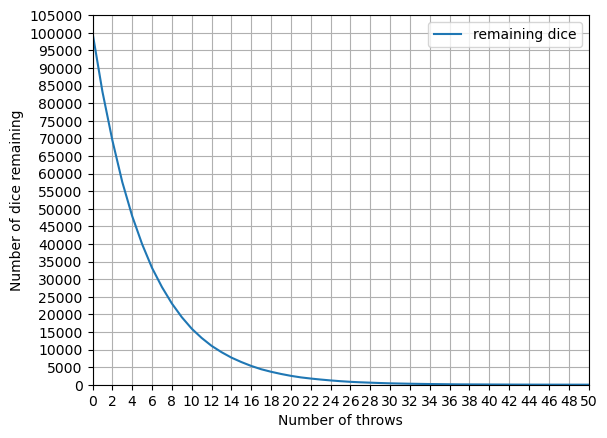

In [11]:
# Show in graph

df.plot(x='N', y='remaining dice')
plt.locator_params(nbins=25)
plt.xlim(0, n_throws)
plt.xlabel('Number of throws')
plt.ylim(0, n_dice*1.05)
plt.ylabel('Number of dice remaining')
plt.grid()

plt.show()


Text(0, 0.5, 'number of undecayed nuclei')

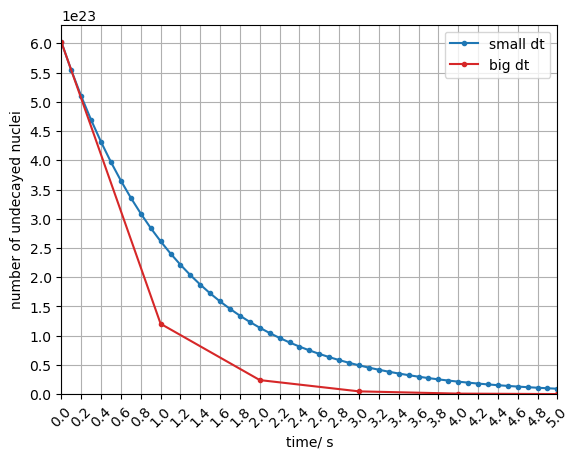

In [7]:
k = 0.8

N = 6.02e23

A = k * N

dt = 1

T = 5

def decay(N, k, T, dt):
    n_decay_times = int(T/dt)
    undecayed = np.zeros(n_decay_times+1)
    undecayed[0] = N
    for time in range(1, n_decay_times+1):
        if undecayed[time-1] - k * undecayed[time-1] * dt <= 0:
            undecayed[time] = 0
        else:
            undecayed[time] = undecayed[time-1] - k * undecayed[time-1] * dt
    return undecayed

def plot_decay(N, k, T, dt, **kwargs):

    plt.plot(np.linspace(0, T, int(T/dt)+1), decay(N, k, T, dt), color=kwargs.get('color'), label=kwargs.get('label'), marker=kwargs.get('marker'))

plot_decay(N, k, T, dt=0.1, color='C0', label='small dt', marker='.')
plot_decay(N, k, T, dt=1, color='C3', label='big dt', marker='.')

plt.locator_params(nbins=25)
plt.grid()
plt.legend()
plt.xlim(0, T)
plt.xlabel('time/ s')
plt.xticks(rotation=45)
plt.ylim(0, N*1.05)
plt.ylabel('number of undecayed nuclei')



Text(0, 0.5, 'number of undecayed nuclei')

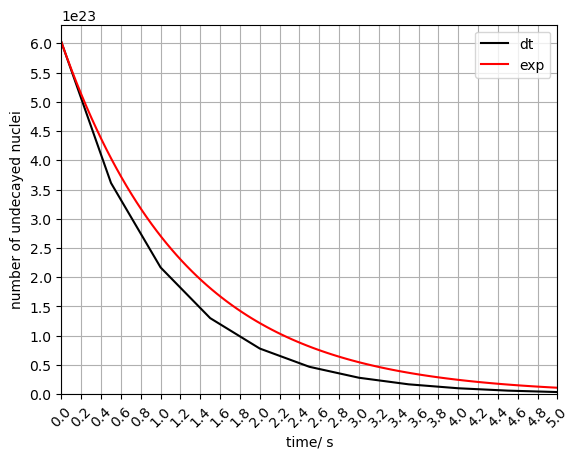

In [8]:
# compare with a graph of exponential function

def undecayed_num_exp(N, k, T):
    return N * np.exp(-k * T)


intervals = 100
t = np.linspace(0, T, intervals)
undecayed_vec = np.vectorize(undecayed_num_exp)
undecayed = undecayed_vec(N, k, t)

plot_decay(N, k, T, dt=0.5, color='black', label='dt')
plt.plot(t, undecayed, color='red', label='exp')

plt.locator_params(nbins=25)
plt.grid()
plt.legend()
plt.xlim(0, T)
plt.xlabel('time/ s')
plt.xticks(rotation=45)
plt.ylim(0, N*1.05)
plt.ylabel('number of undecayed nuclei')

